In [ ]:
install.packages("kohonen")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("aweSOM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("kohonen")
library("aweSOM")
library("cluster")


In [ ]:
file_path <- "/cleaned_form_akkio_ranges_in_classes.csv"

In [ ]:
full.data <- read.csv(file_path)
## Select variables
train.data <- full.data[,c(1,3,4,5,6,7,8,9,10,11,13)]
str(train.data)
#train.data$Happiness <- as.integer(train.data$Happiness)
train.data <- scale(train.data)

'data.frame':	209 obs. of  11 variables:
 $ Age                 : int  2 2 2 2 2 2 4 2 4 3 ...
 $ Min_attention       : int  3 4 8 2 5 9 3 4 5 5 ...
 $ Stress              : num  6 7 8 5 8 4 8 4 8 5 ...
 $ Happiness           : num  8 10 8 8 5 8 7 7 8 6 ...
 $ Social_relationships: int  5 5 3 3 4 2 1 3 3 1 ...
 $ Sleep_hours         : int  4 3 4 5 3 4 5 5 4 5 ...
 $ Meditation_time     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Reading_time        : int  1 1 1 8 5 8 1 1 1 5 ...
 $ Mind_wandering      : num  2 2 4 5 1 4 1 4 3 2 ...
 $ Sport               : int  5 6 3 6 3 6 1 2 6 6 ...
 $ Social_media_time   : int  8 6 6 5 6 5 6 4 1 5 ...


In [ ]:
# Define the range of values for grid size, alpha, and radius
grid_sizes <- c(9, 10, 11)  # Adjust the grid sizes as needed
alpha_combinations <- list(c(0.1, 0.05), c(0.2, 0.1), c(0.2, 0.05))  # Adjust the alpha values as needed
radii <- c(2, 3, 4)  # Adjust the radii values as needed

# Create an empty dataframe to store results
results_df <- data.frame(GridSize = numeric(0), Alpha1 = numeric(0), Alpha2 = numeric(0), Radius = numeric(0),
                         QuantizationError = numeric(0), ExplainedVariance = numeric(0),
                         TopographicError = numeric(0), KaskiLagusError = numeric(0))

# Loop through different combinations of grid size, alpha, and radius
for (grid_size in grid_sizes) {
  for (alphas in alpha_combinations) {
    for (radius in radii) {
      alpha1 <- alphas[1]
      alpha2 <- alphas[2]

      ### RNG Seed (for reproducibility)
      set.seed(170)

      # Initialize SOM
      init_som <- somInit(train.data, grid_size, grid_size)

      # Train SOM
      attention_som <- kohonen::som(train.data, grid = kohonen::somgrid(grid_size, grid_size, "hexagonal"),
                                    rlen = 500, alpha = c(alpha1, alpha2), radius = c(radius),
                                    dist.fcts = "sumofsquares", init = init_som, maxNA.fraction = 0.05)

      # Calculate quality measures
      quality <- somQuality(attention_som, train.data)
      quantization_error <- quality$err.quant
      explained_variance <- quality$err.varratio
      topographic_error <- quality$err.topo
      kaski_lagus_error <- quality$err.kaski

      # Store the results in the dataframe
      results_df <- rbind(results_df, data.frame(GridSize = grid_size, Alpha1 = alpha1, Alpha2 = alpha2, Radius = radius,
                                                 QuantizationError = quantization_error, ExplainedVariance = explained_variance,
                                                 TopographicError = topographic_error, KaskiLagusError = kaski_lagus_error))
    }
  }
}

# Print the results
results_df


GridSize Alpha1 Alpha2 Radius QuantizationError ExplainedVariance
1   9       0.1    0.05   2      1.969526          82.01            
2   9       0.1    0.05   3      1.887813          82.76            
3   9       0.1    0.05   4      1.891362          82.72            
4   9       0.2    0.10   2      1.774541          83.79            
5   9       0.2    0.10   3      1.819859          83.38            
6   9       0.2    0.10   4      1.855493          83.05            
7   9       0.2    0.05   2      1.812232          83.45            
8   9       0.2    0.05   3      1.832362          83.26            
9   9       0.2    0.05   4      1.874883          82.87            
10 10       0.1    0.05   2      1.546726          85.87            
11 10       0.1    0.05   3      1.480281          86.48            
12 10       0.1    0.05   4      1.557363          85.77            
13 10       0.2    0.10   2      1.437460          86.87            
14 10       0.2    0.10   3      1.423483          87.00            
15 10       0.2    0.10   4      1.398328          87.23            
16 10       0.2    0.05   2      1.461282          86.65            
17 10       0.2    0.05   3      1.477627          86.50            
18 10       0.2    0.05   4      1.466749          86.60            
19 11       0.1    0.05   2      1.203514          89.01            
20 11       0.1    0.05   3      1.240827          88.67            
21 11       0.1    0.05   4      1.250850          88.57            
22 11       0.2    0.10   2      1.051261          90.40            
23 11       0.2    0.10   3      1.111664          89.85            
24 11       0.2    0.10   4      1.199235          89.05            
25 11       0.2    0.05   2      1.193045          89.10            
26 11       0.2    0.05   3      1.208851          88.96            
27 11       0.2    0.05   4      1.209338          88.95            
   TopographicError KaskiLagusError
1  0.3684211        6.405542       
2  0.4162679        6.752300       
3  0.4354067        6.951191       
4  0.5693780        9.101132       
5  0.6028708        9.381670       
6  0.4401914        7.393847       
7  0.5167464        7.743482       
8  0.4401914        7.121988       
9  0.4880383        7.099265       
10 0.3636364        6.413404       
11 0.4114833        6.572348       
12 0.4210526        6.763433       
13 0.5837321        8.009310       
14 0.4832536        7.516513       
15 0.4832536        7.875961       
16 0.3636364        6.896163       
17 0.3779904        6.413068       
18 0.4401914        6.694794       
19 0.3205742        5.242006       
20 0.4354067        6.336530       
21 0.3349282        6.153623       
22 0.5789474        9.223358       
23 0.5263158        8.284333       
24 0.4210526        7.410440       
25 0.5215311        7.349683       
26 0.3779904        6.068409       
27 0.3636364        5.832641

In [ ]:
### RNG Seed (for reproducibility)
set.seed(170)
### Initialization (PCA grid)
init2 <- somInit(train.data, 10, 10)
## Train SOM
attention.som <- kohonen::som(train.data, grid = kohonen::somgrid(10, 10 , "hexagonal"),
                         rlen = 500, alpha = c(0.1, 0.05), radius = 3,
                         dist.fcts = "sumofsquares", init = init2, maxNA.fraction = 0.05)

In [ ]:
## QUALITY ASSESSMENT
quality <- somQuality(attention.som, train.data)
print(quality)


## Quality measures:
 * Quantization error     :  1.480281 
 * (% explained variance) :  86.48 
 * Topographic error      :  0.4114833 
 * Kaski-Lagus error      :  6.572348 
 
## Number of obs. per map cell:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  4   1   3   3   3   3   2   1   4   4   1   1   4   1   0   2   6   1   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   2   1   3   2   1   3   1   1   2   2   4   1   1   3   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   4   1   2   6   0   3   2   1   4   2   1   2   3   2   2   2   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   4   2   1   3   3   0   1   1   2   2   3   3   2   1   1   4   2   1   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   3   2   1   3   1   2   3   2   2   2   2   3  

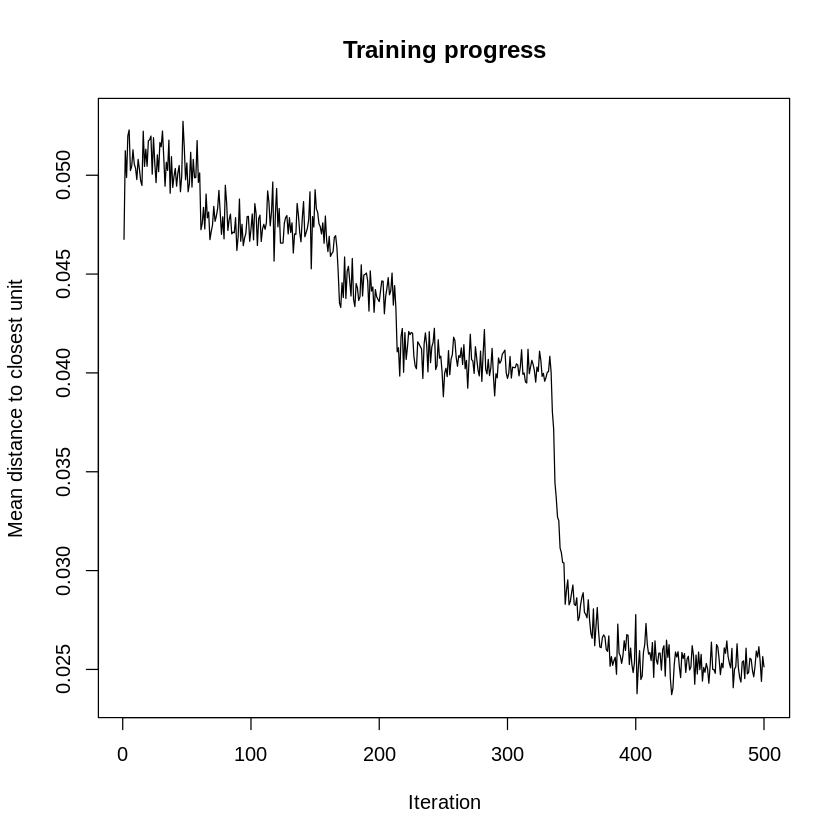

In [ ]:
# Plot the changes with xlabel (iteration)
plot(attention.som, type = "changes")



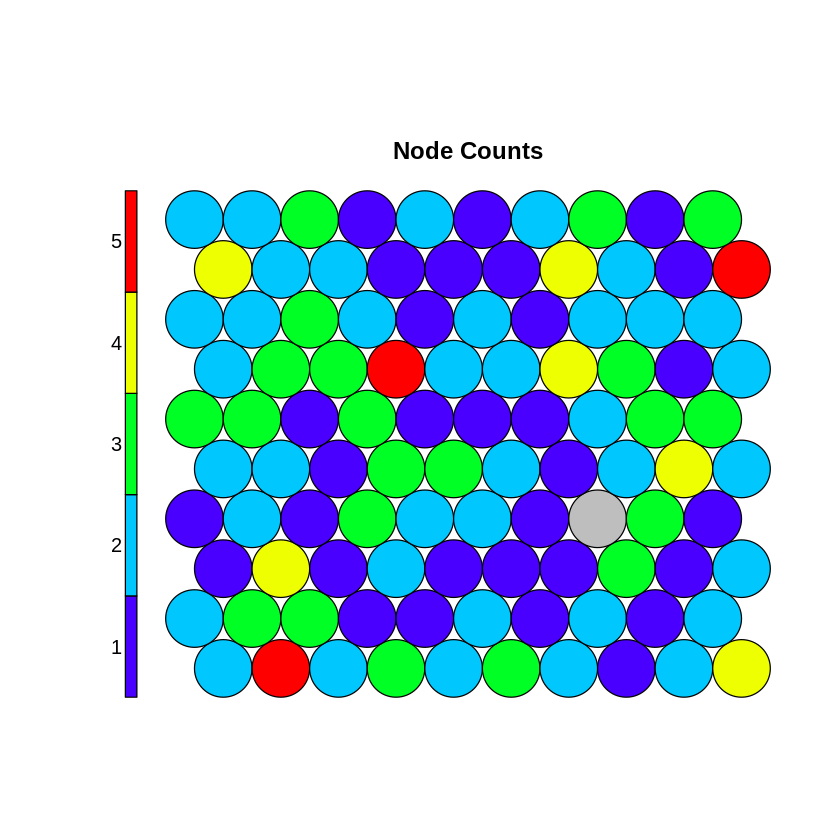

In [ ]:
coolBlueHotRed <- function(n, alpha = 1) { rainbow(n, end=5/7, alpha=1)[n:1] }

plot(attention.som, type = "counts", main="Node Counts", palette.name=coolBlueHotRed, ncolors= 5)


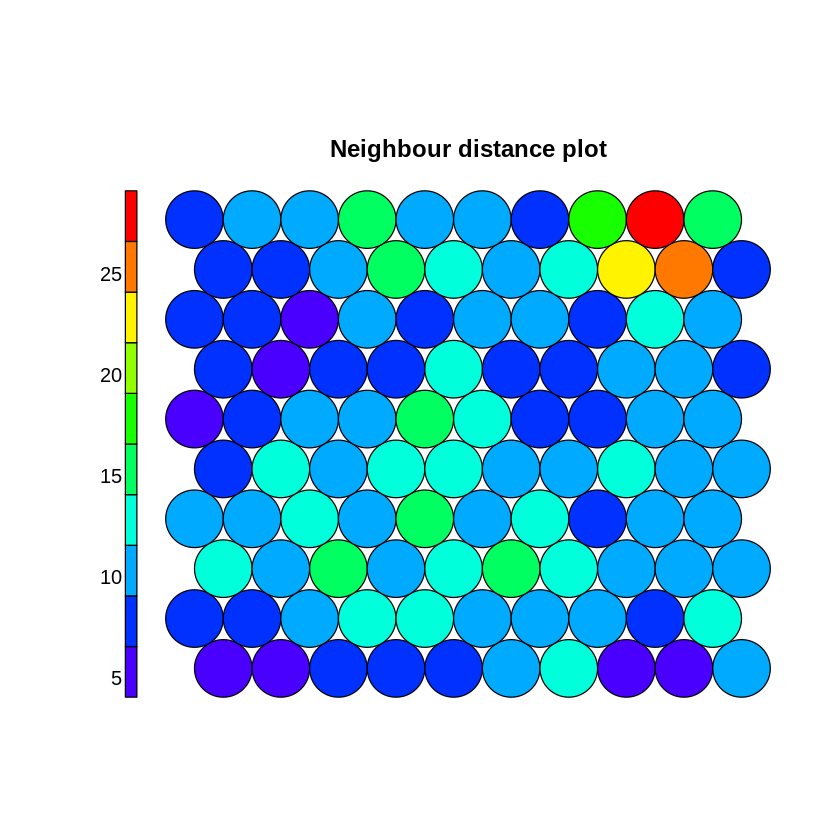

In [ ]:
plot(attention.som, type = "dist.neighbours", main="Neighbour distance plot", palette.name=coolBlueHotRed, ncolors= 10)

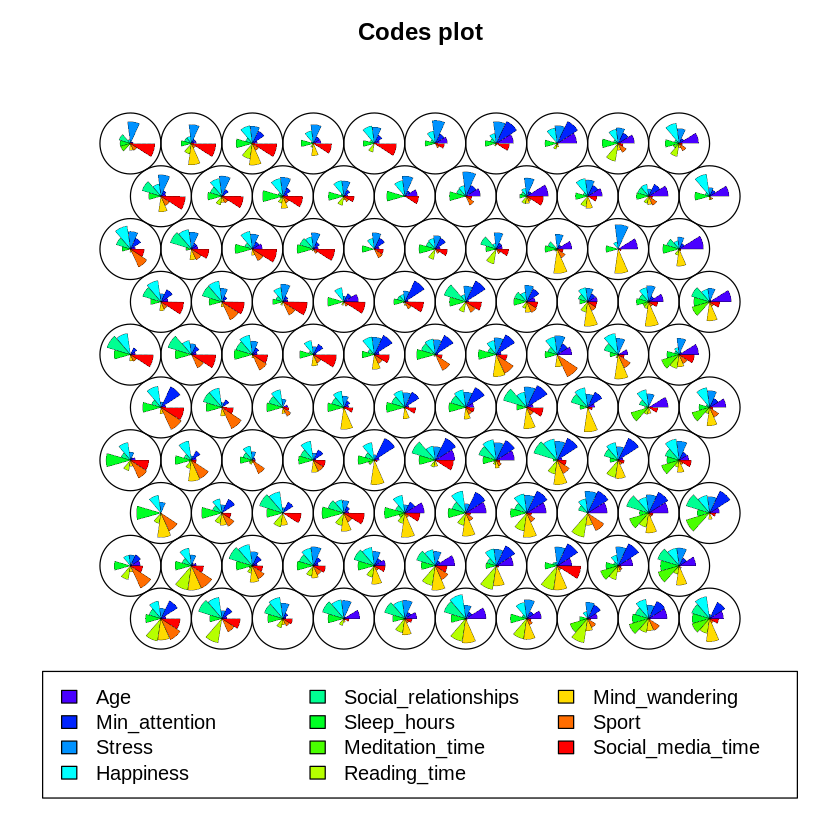

In [ ]:
# create plot
plot(attention.som, type = "codes", palette.name=coolBlueHotRed)

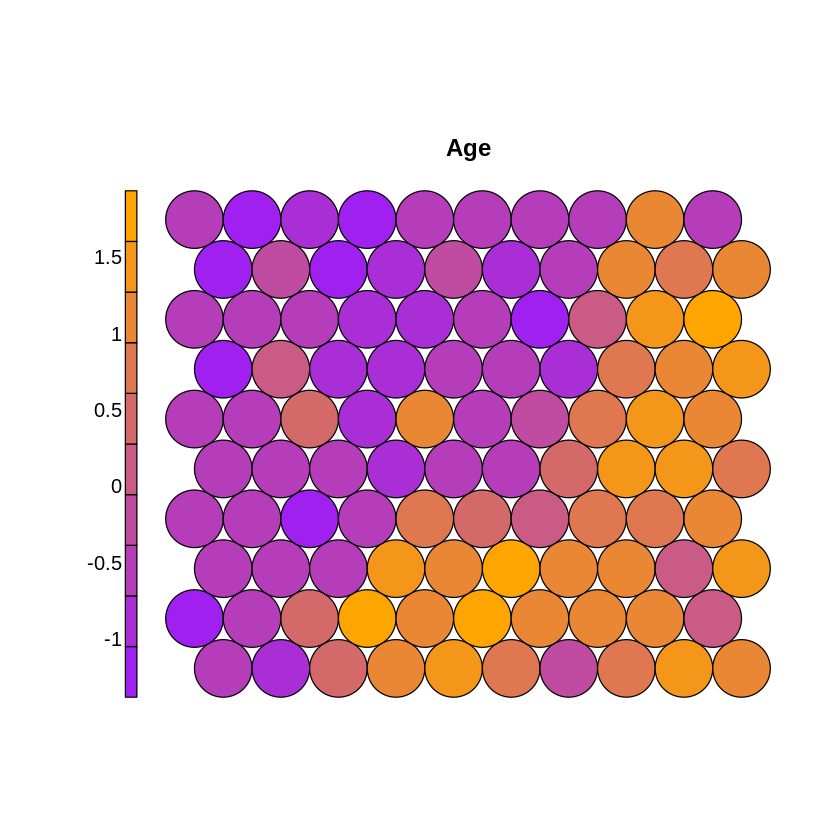

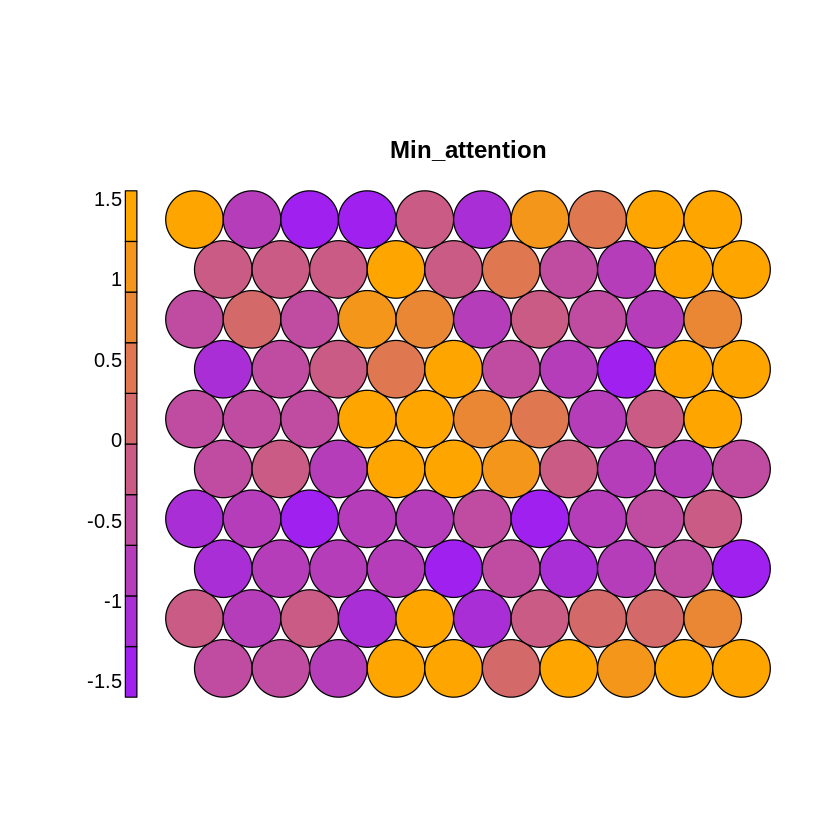

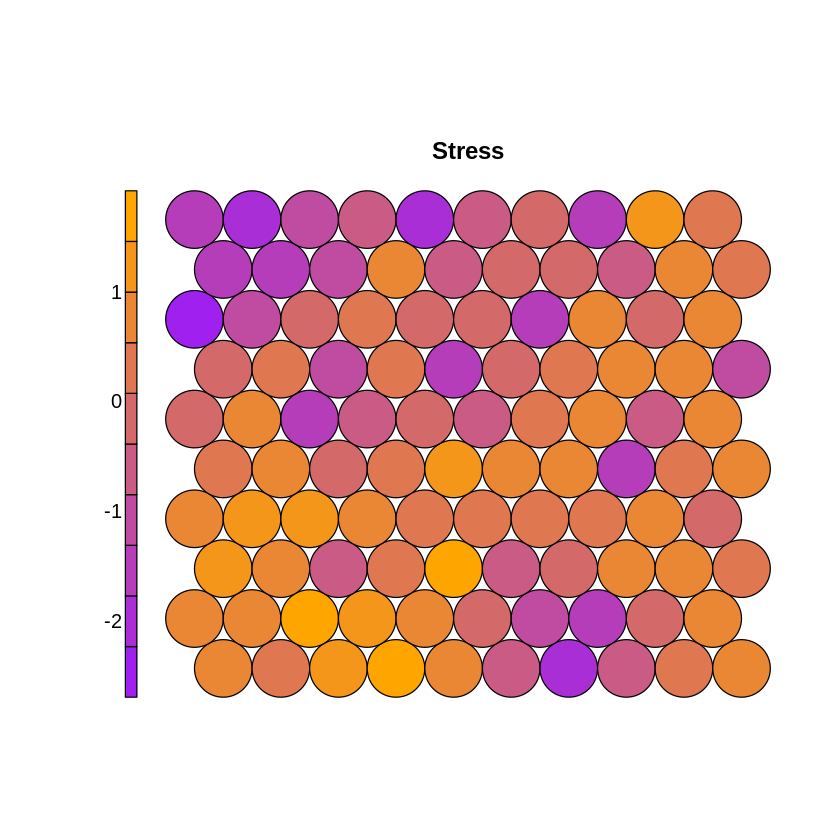

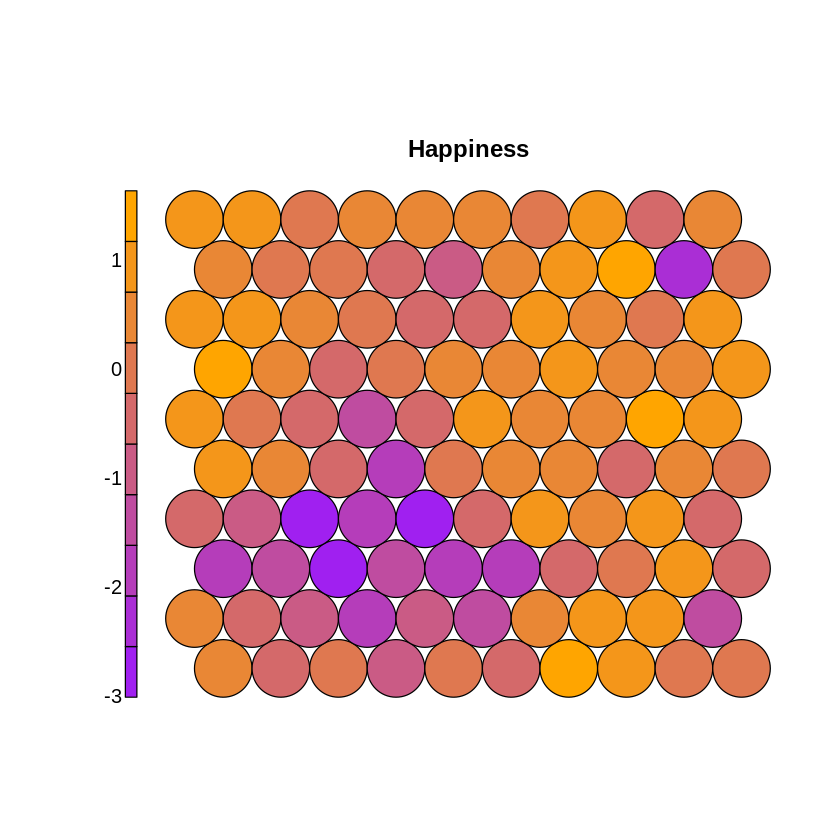

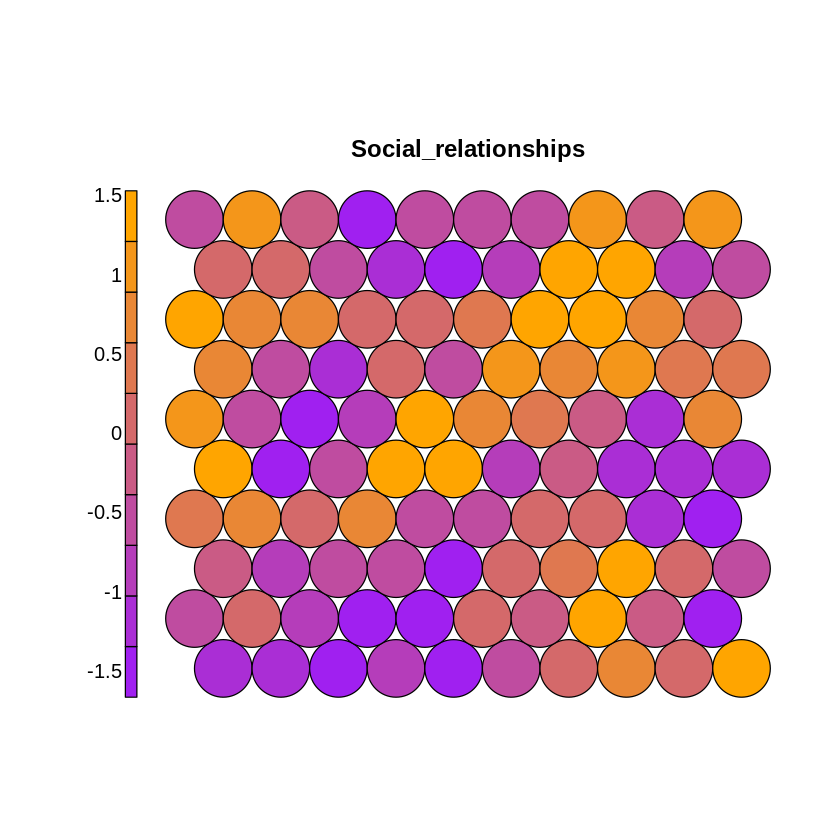

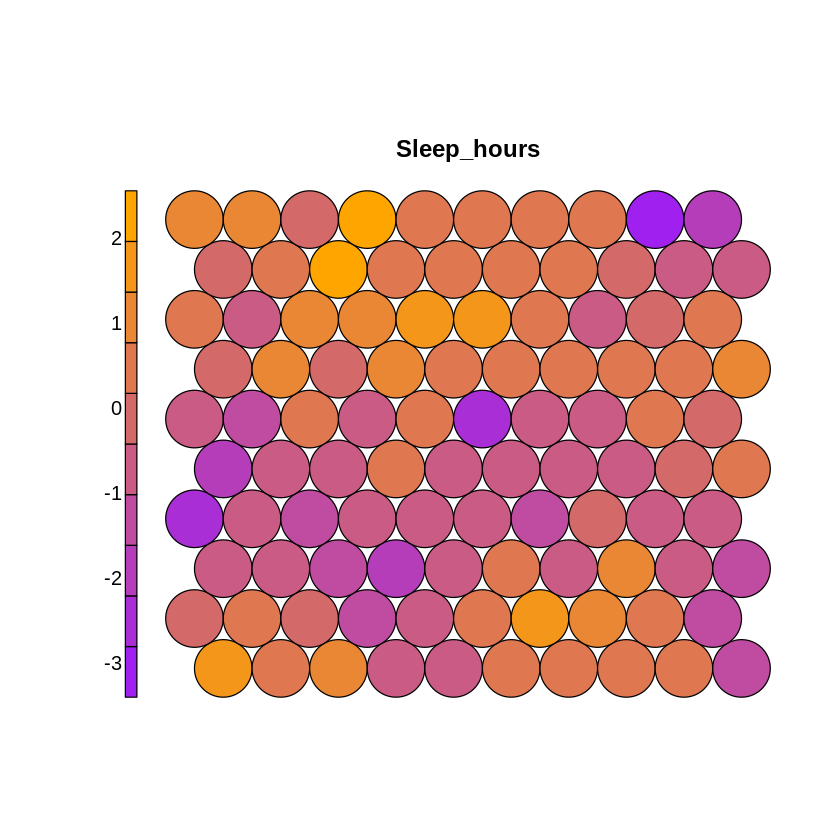

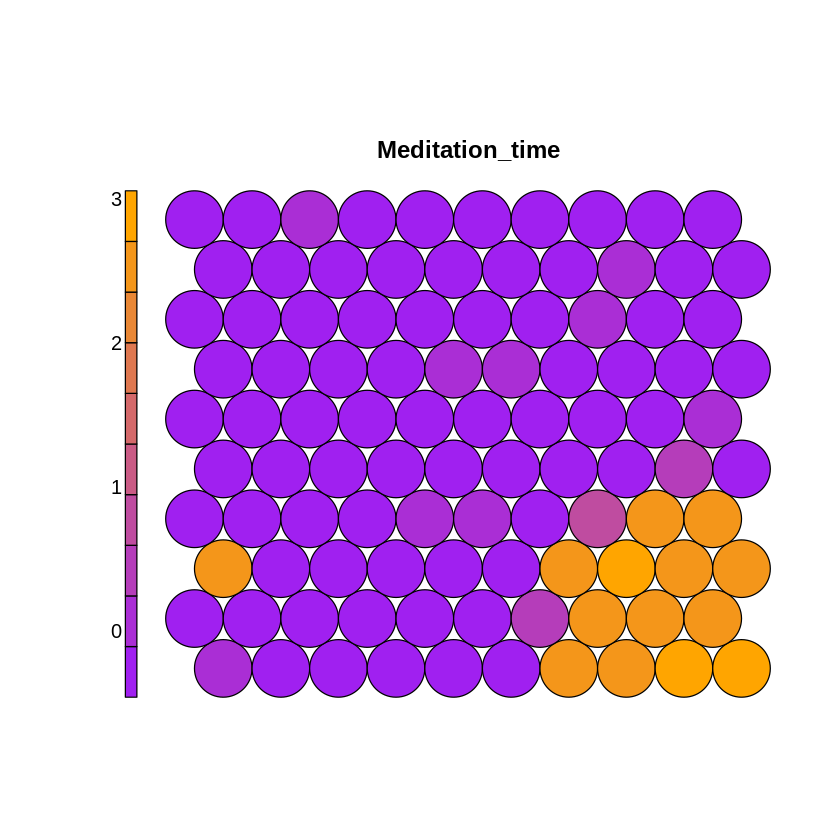

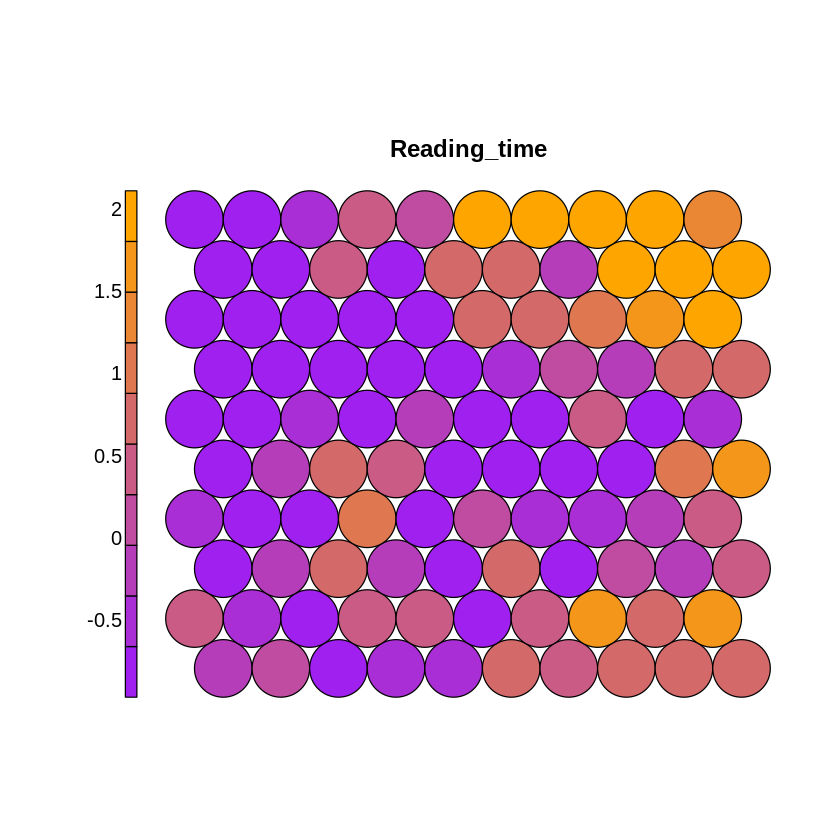

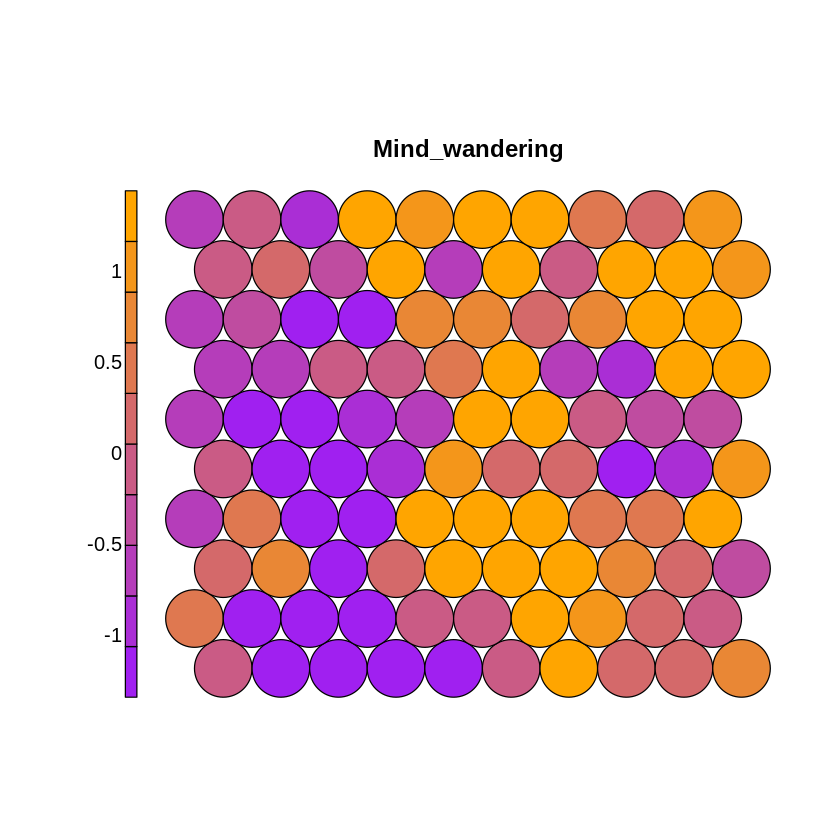

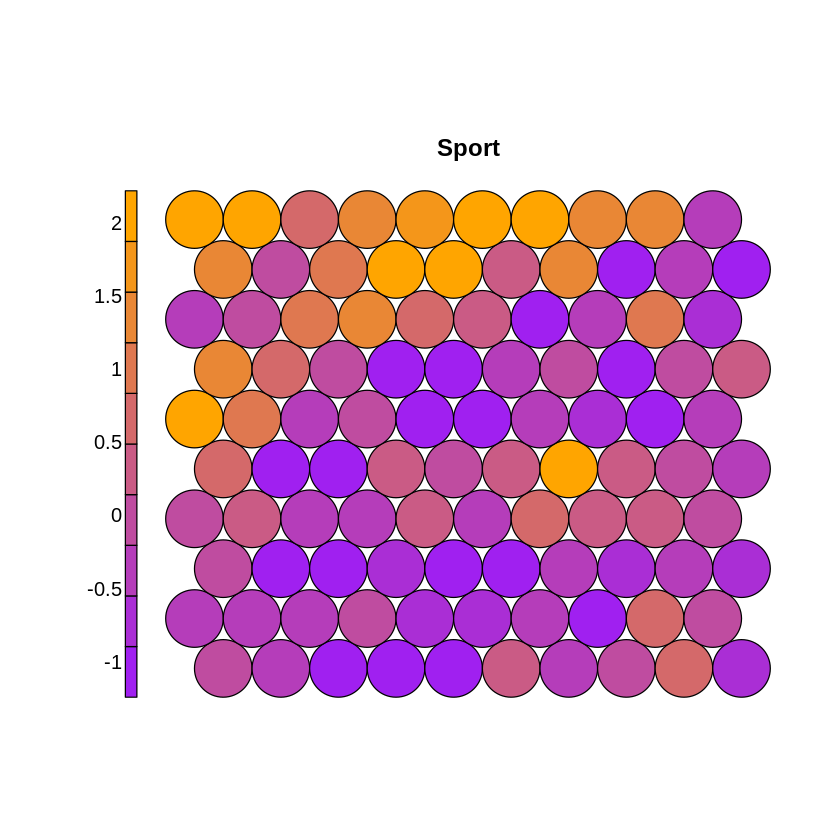

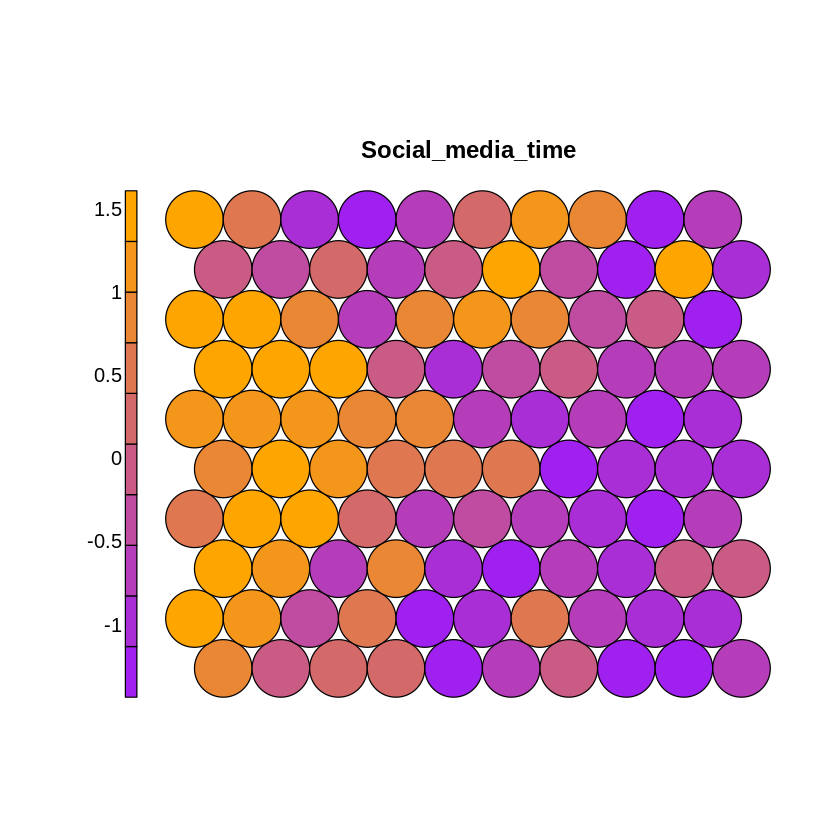

In [ ]:
purpleToorangePalette <- colorRampPalette(c("purple", "orange"))
for (var in 1:11) {
  plot(attention.som,
       type = "property",
       property = getCodes(attention.som)[,var],
       main=colnames(getCodes(attention.som))[var],
       palette.name = purpleToorangePalette,
       ncolors= 10
)
}

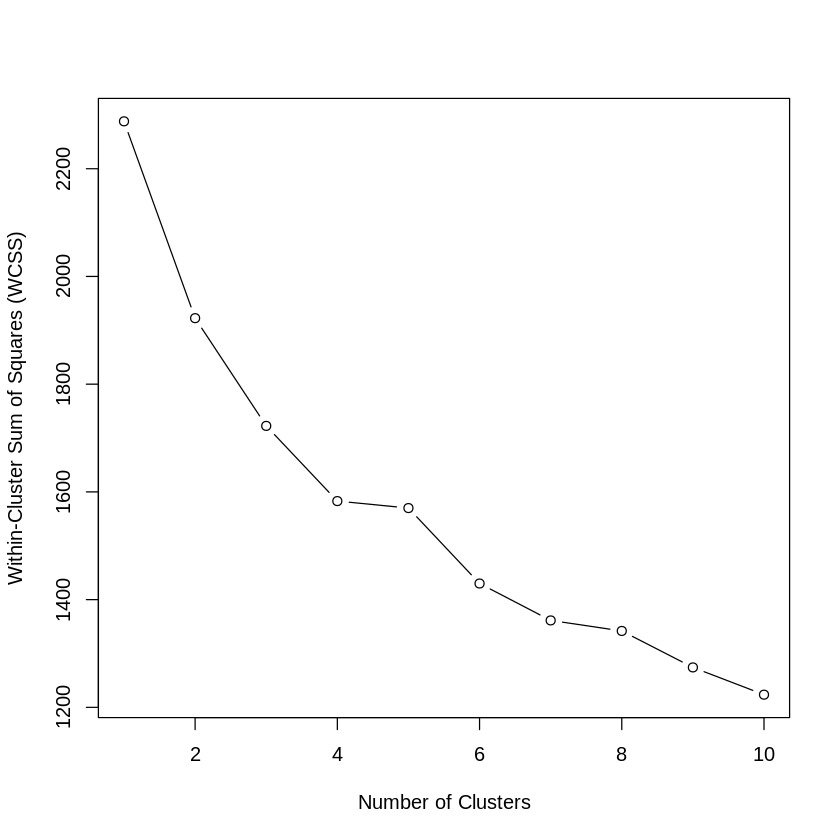

In [ ]:
###### Elbow Method
set.seed(123)
# Initialize an empty vector to store WCSS values
wcss <- vector("numeric", length = 10)

# Calculate WCSS for different numbers of clusters (1 to 10)
for (i in 1:10) {
  kmeans_model <- kmeans(train.data, centers = i)
  wcss[i] <- kmeans_model$tot.withinss
}

# Plot the Elbow Method graph
plot(1:10, wcss, type = "b", xlab = "Number of Clusters", ylab = "Within-Cluster Sum of Squares (WCSS)")


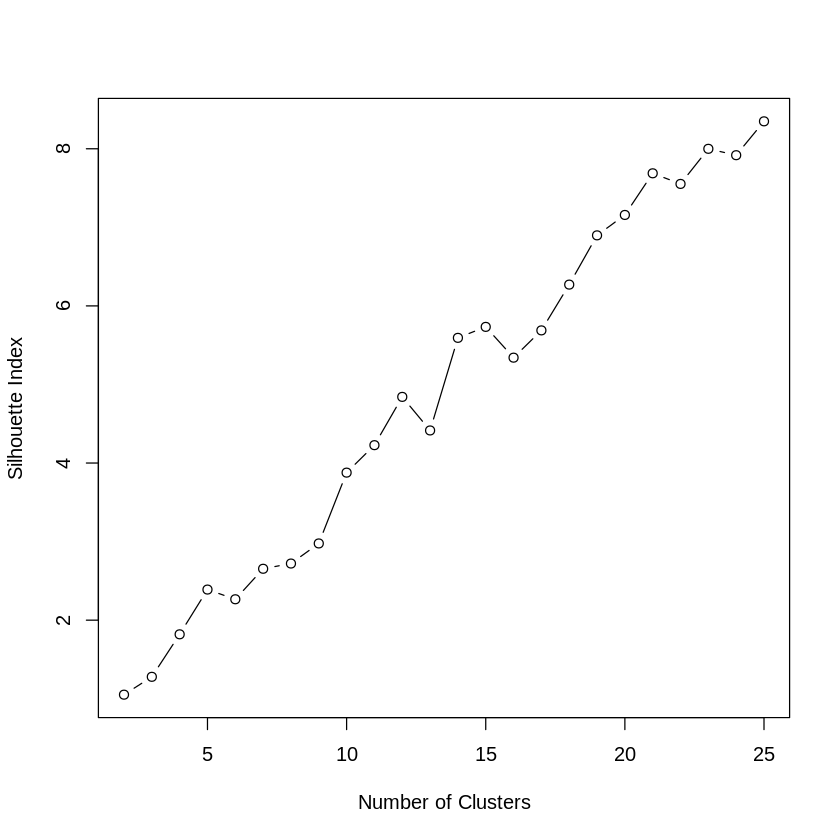

In [ ]:
#####  Silhouette Index
# Set a random seed for reproducibility
set.seed(123)  # You can use any integer as the seed
# Initialize a vector to store silhouette scores
silhouette_scores <- numeric(25)  # Initialize with zeros

# Calculate Silhouette Index for different numbers of clusters (2 to 10)
for (i in 2:25) {
  kmeans_model <- kmeans(train.data, centers = i)
  silhouette_scores[i] <- mean(silhouette(kmeans_model$cluster, dist(train.data)))
}

# Plot the Silhouette Index values
plot(2:25, silhouette_scores[2:25], type = "b", xlab = "Number of Clusters", ylab = "Silhouette Index")


Warning message:
“did not converge in 10 iterations”


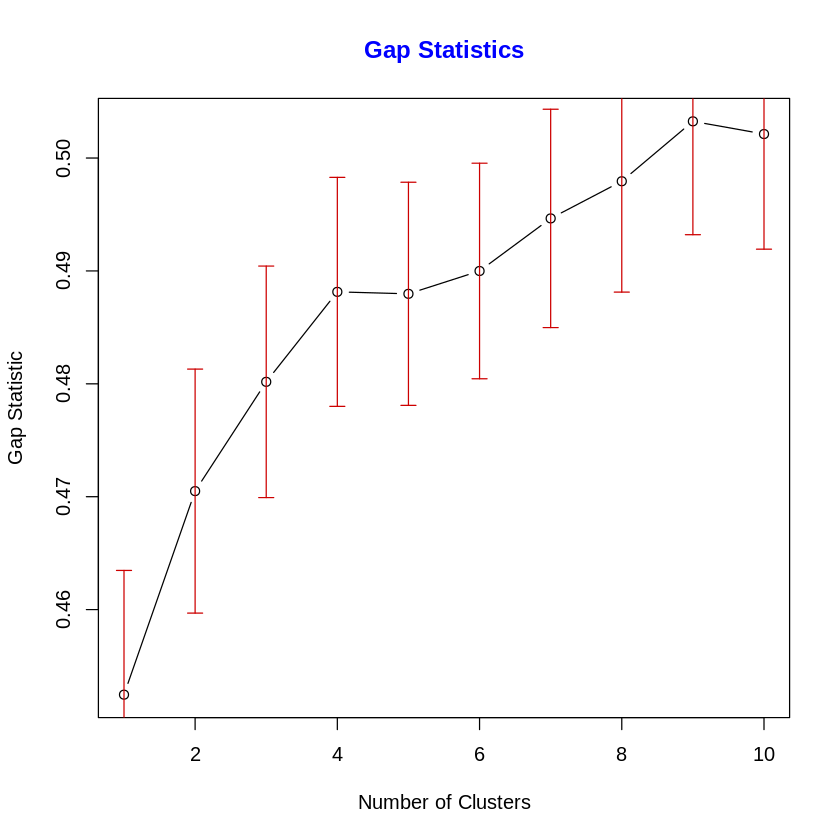

In [ ]:
library(cluster)


gap_stat <- clusGap(train.data, FUN = kmeans, nstart = 20, K.max = 10, B = 100)

# Plot the gap statistics
plot(gap_stat, main = "Gap Statistics", xlab = "Number of Clusters", ylab = "Gap Statistic", col.main = "blue")

# Add a reference line based on the average of the gap statistics for random data
abline(h = gap_stat$tab.b, col = "orange", lty = 2)

#https://stats.stackexchange.com/questions/95290/how-should-i-interpret-gap-statistic


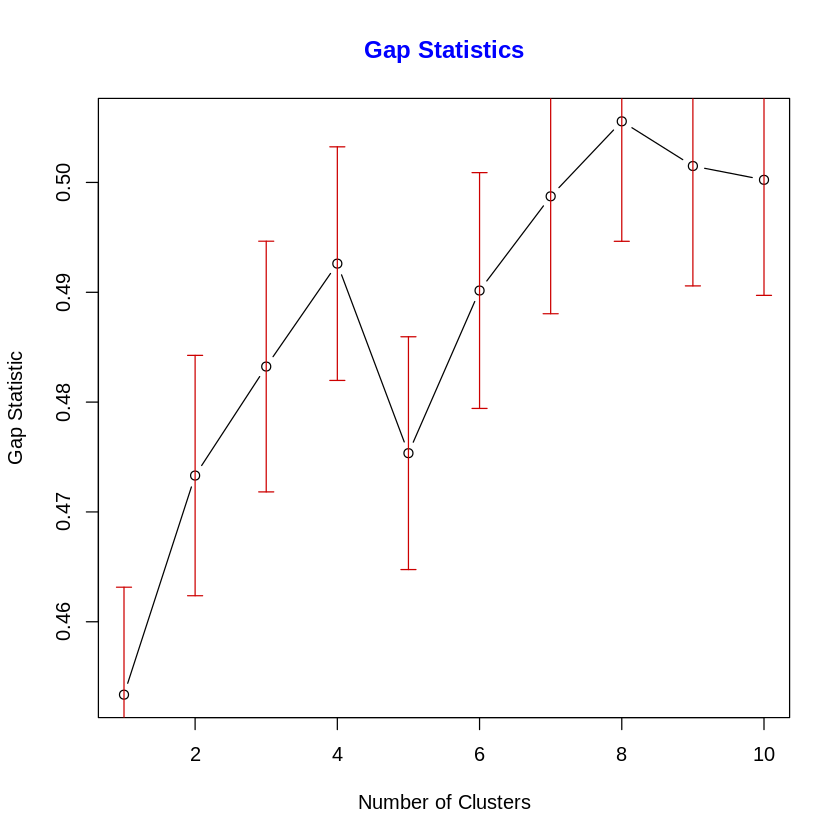

In [ ]:


# Function to perform k-means clustering
kmeans_cluster <- function(data, k) {
  kmeans_result <- kmeans(data, centers = k)
  return(list(cluster = kmeans_result$cluster))
}

# Using clusGap to calculate the gap statistic
gap_stat <- clusGap(train.data, FUNcluster = kmeans_cluster, K.max = 10, B = 100)

# Plot the gap statistics
plot(gap_stat, main = "Gap Statistics", xlab = "Number of Clusters", ylab = "Gap Statistic", col.main = "blue")

# Add a reference line based on the average gap statistics for random data
abline(h = gap_stat$tab.b, col = "red", lty = 2)


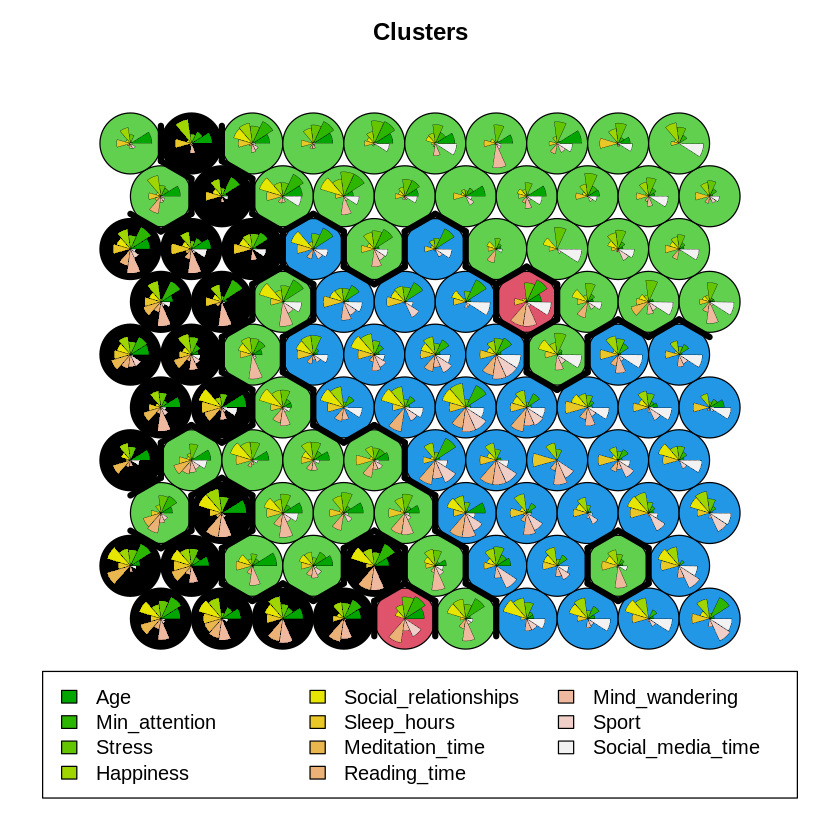

In [ ]:
som_cluster<-cutree(hclust(dist(getCodes(attention.som))),4)
plot(attention.som, type="codes", bgcol = som_cluster, main = "Clusters", col=20)
add.cluster.boundaries(attention.som, som_cluster)

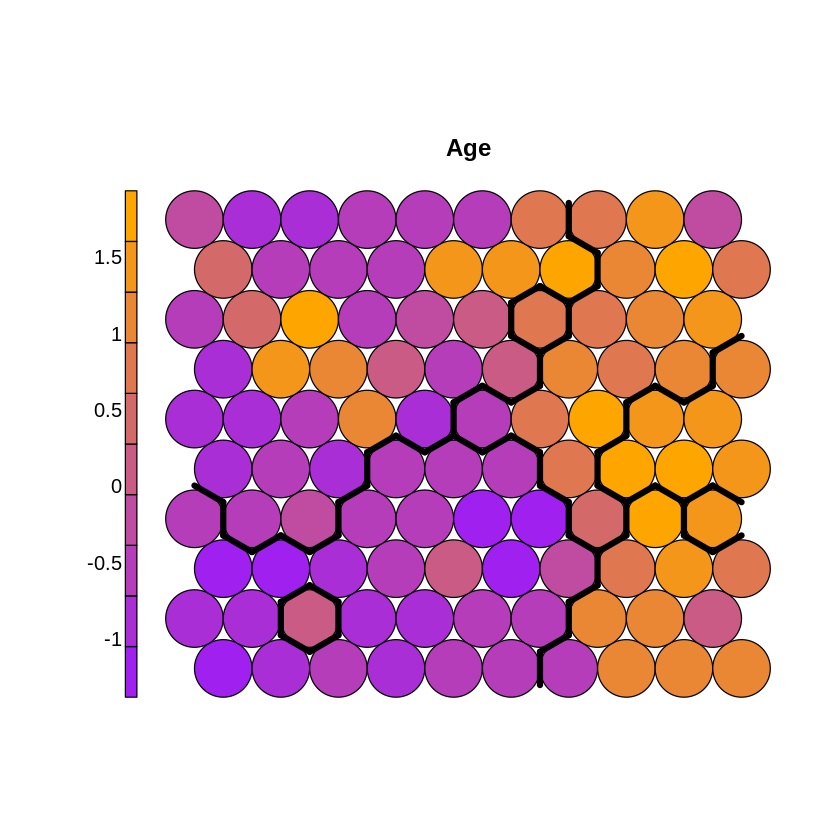

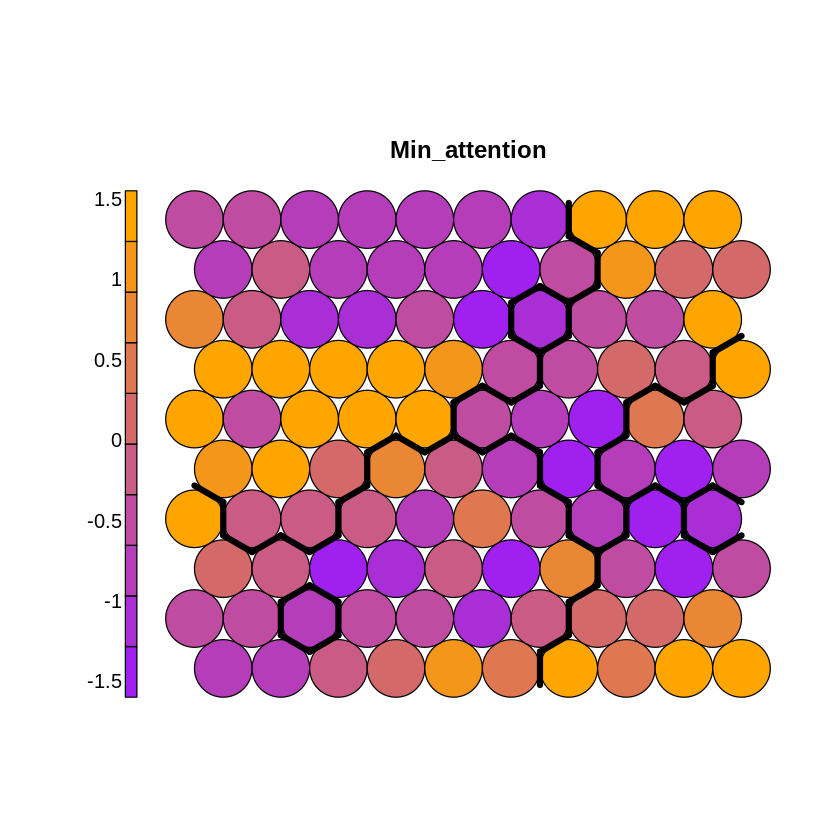

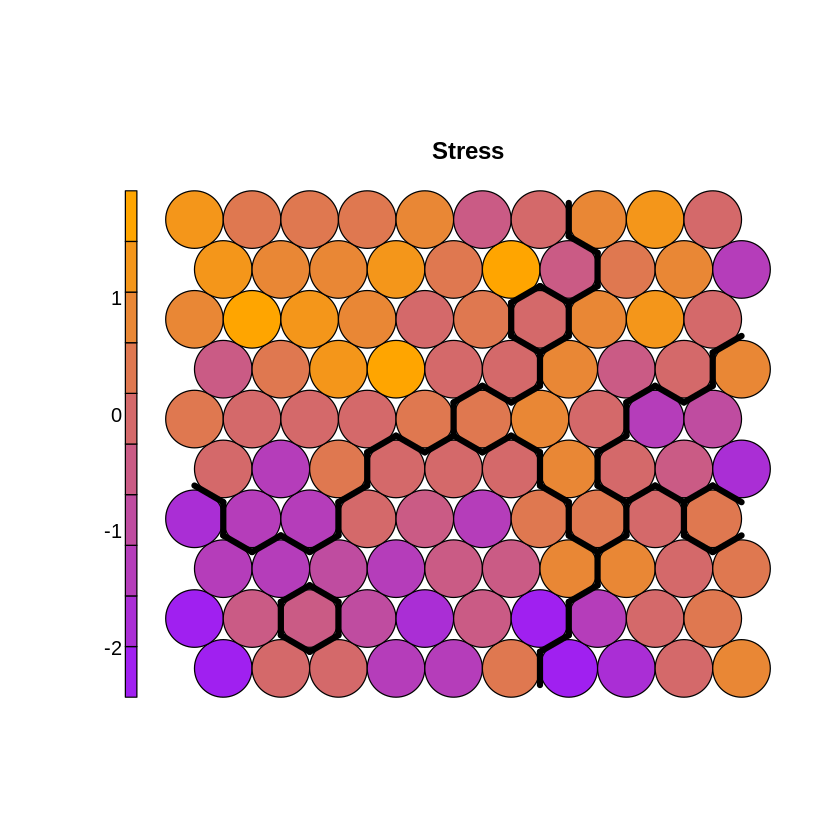

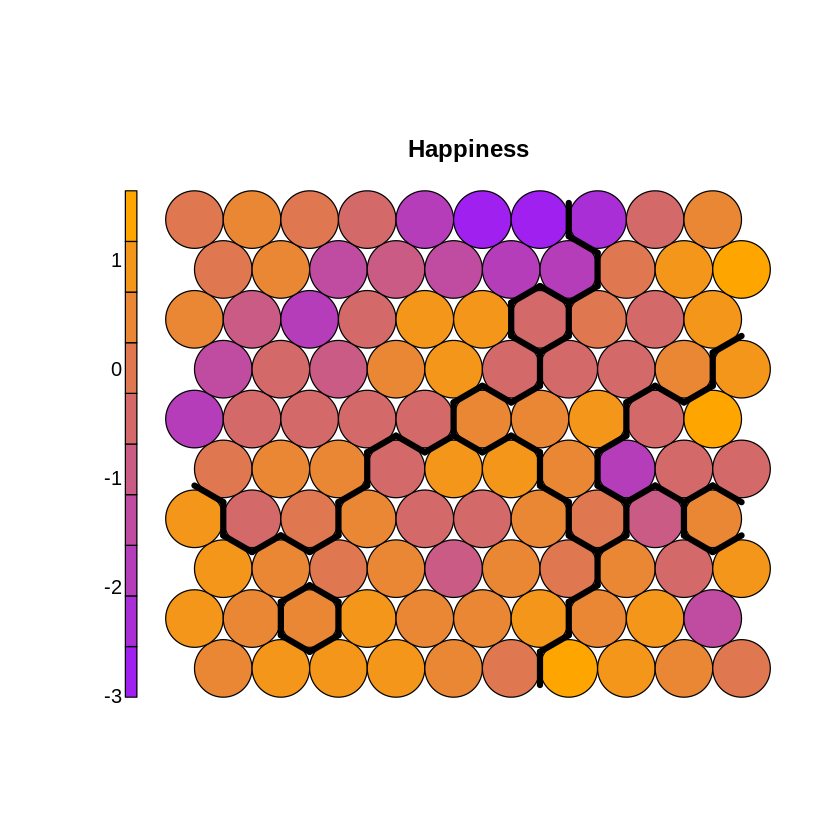

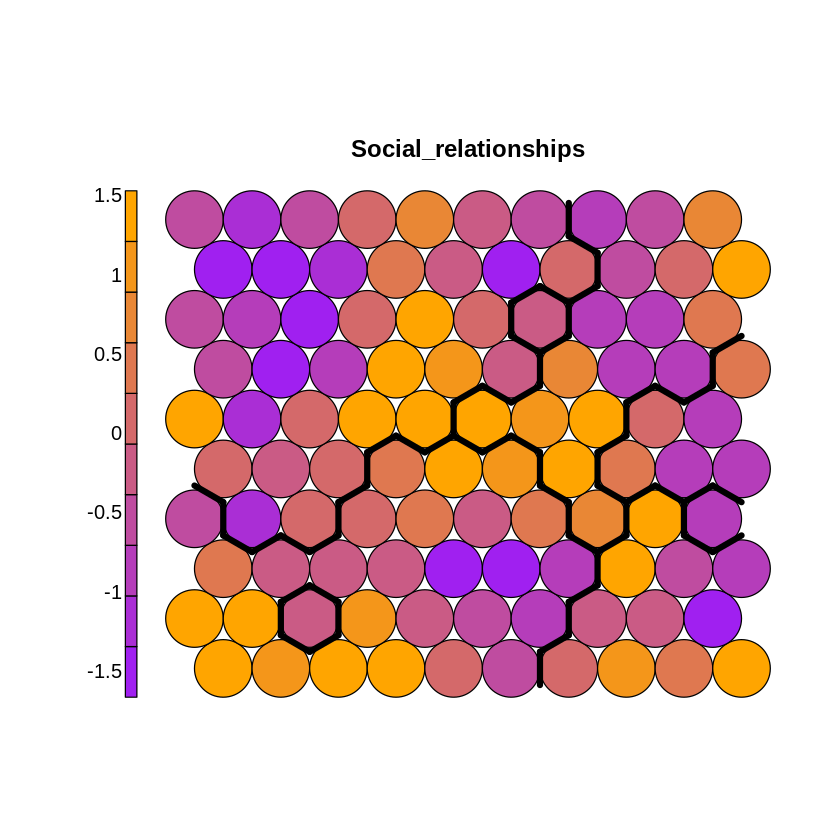

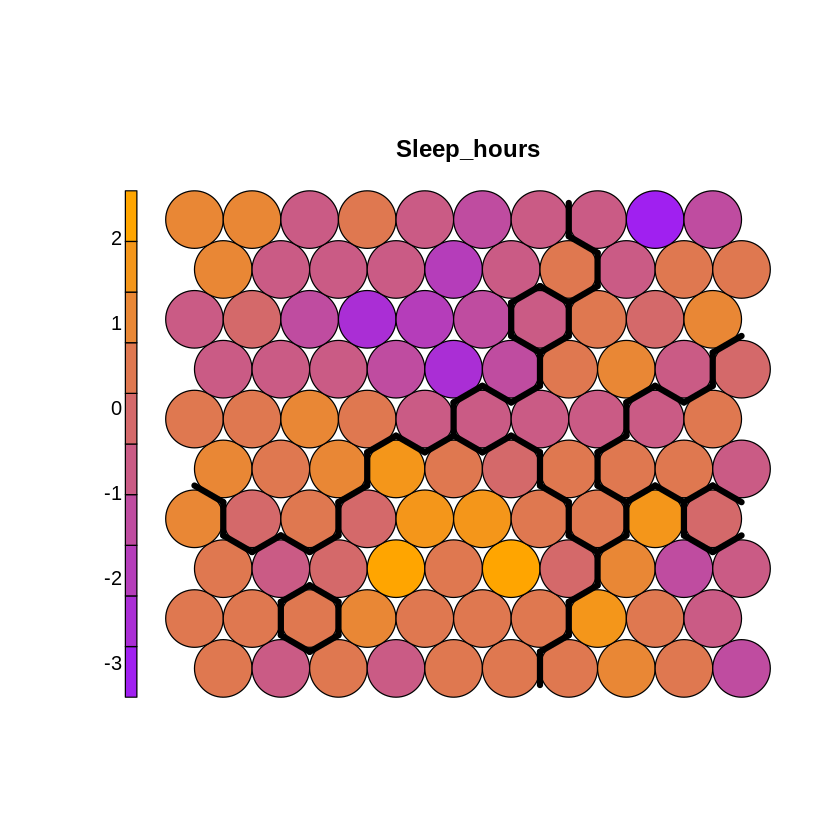

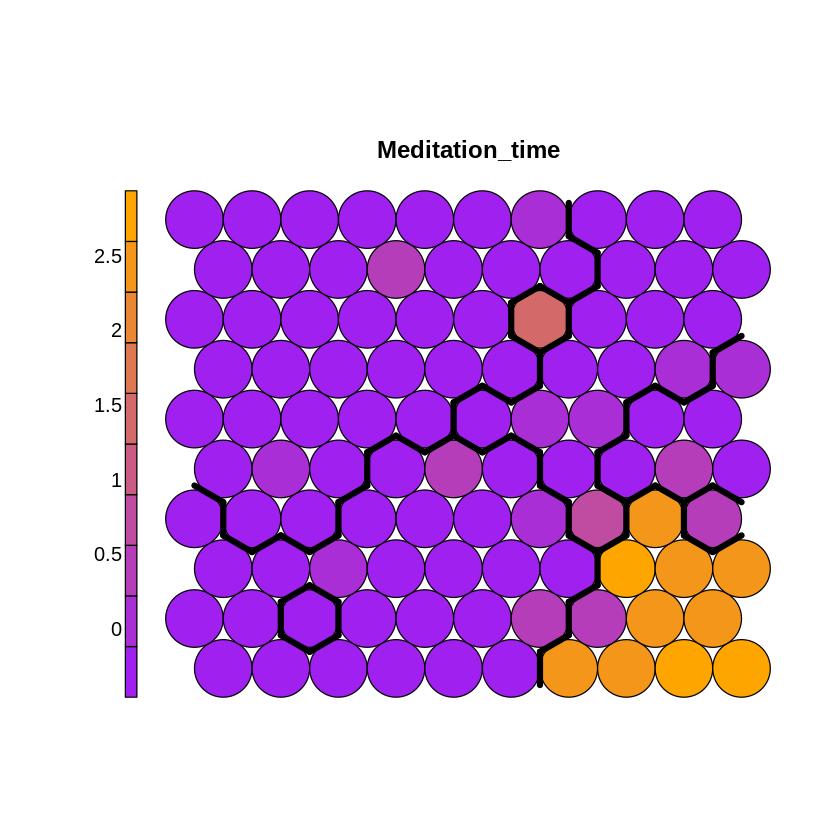

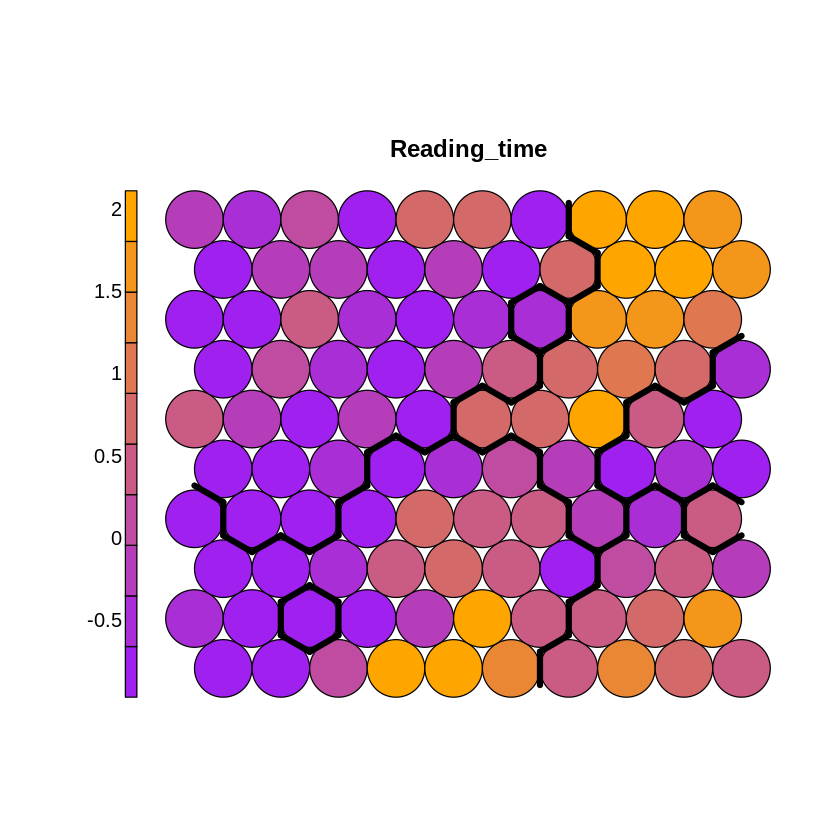

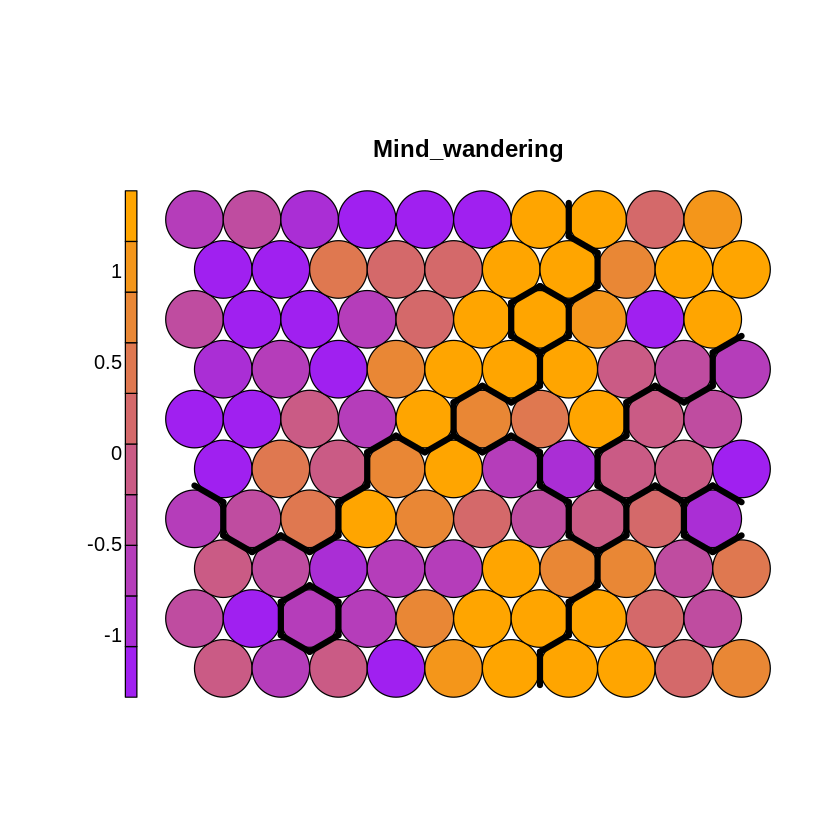

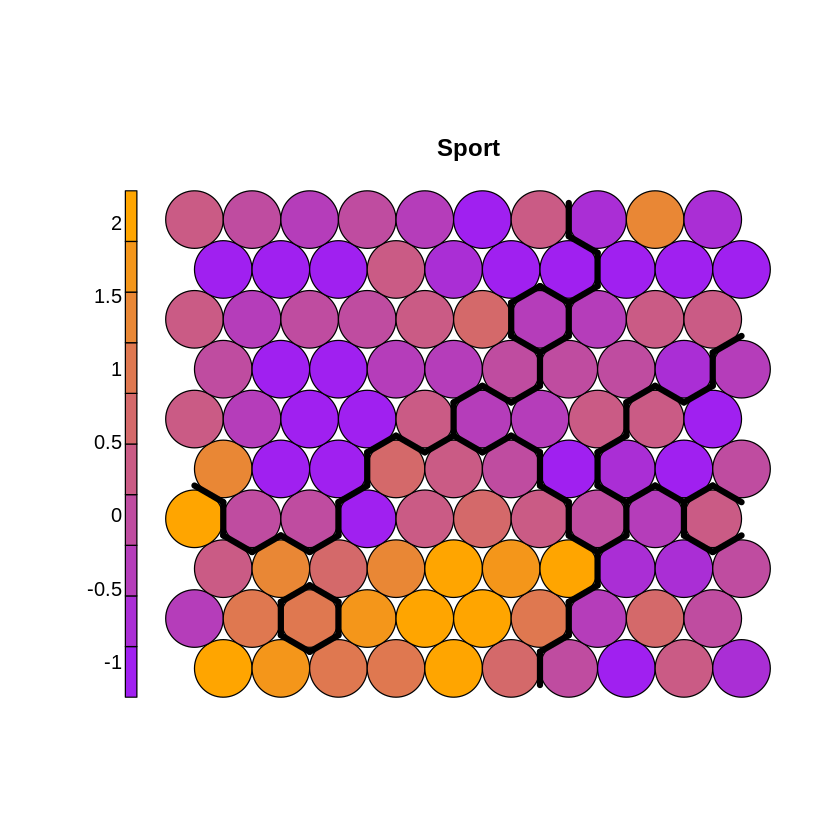

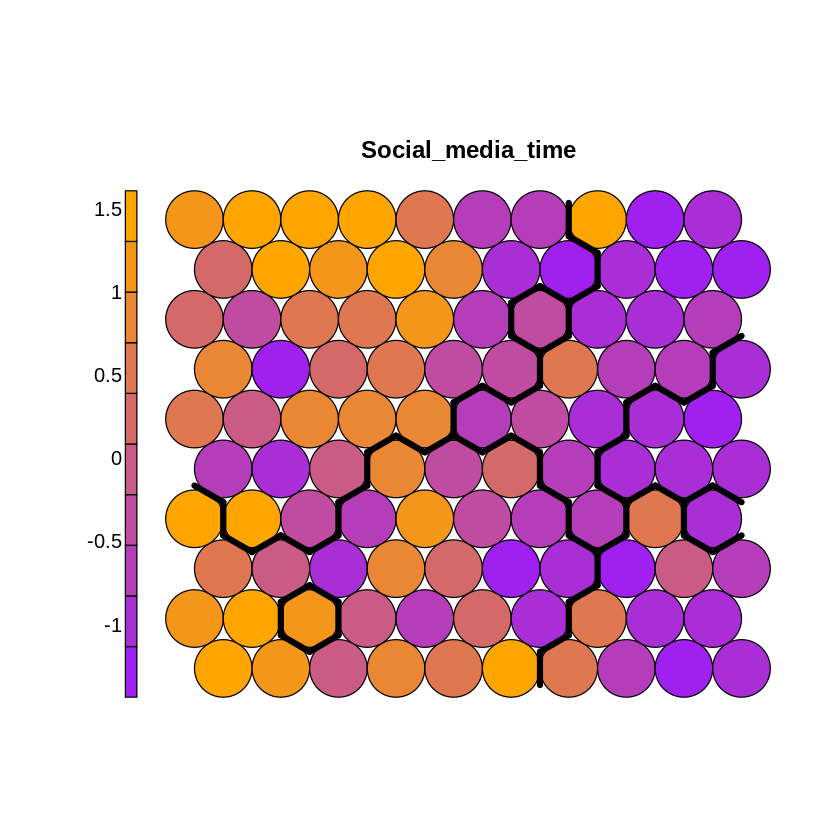

In [ ]:
for (var in 1:11) {
  plot(attention.som,
       type = "property",
       property = getCodes(attention.som)[,var],
       main=colnames(getCodes(attention.som))[var],
       palette.name = purpleToorangePalette,
       ncolors= 10
)
add.cluster.boundaries(attention.som, som_cluster)
}